In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
Normal_Rider_2_copy = pd.read_csv('1hr_normal_rider_cleaned.csv')

In [3]:
# Converting ms to seconds
Normal_Rider_2_copy['seconds'] = Normal_Rider_2_copy['timestamp (ms)']/ 1000

# Converting km/h to m/s
Normal_Rider_2_copy['Speed(m/s)'] = Normal_Rider_2_copy['Speed(Km/h)'] * 1000 / 3600

In [4]:
# Calculating Amag & Gmag
Normal_Rider_2_copy['Amag'] = (Normal_Rider_2_copy['acc_x']**2 + Normal_Rider_2_copy['acc_y']**2 + Normal_Rider_2_copy['acc_z']**2)**0.5
Normal_Rider_2_copy['Gmag'] = (Normal_Rider_2_copy['gyro_x']**2 + Normal_Rider_2_copy['gyro_x']**2 + Normal_Rider_2_copy['gyro_x']**2)**0.5

In [5]:
# Calculate normalised Amag & Gmag using 'Max-min' method.

Normal_Rider_2_copy['Amag_norm'] = ((Normal_Rider_2_copy['Amag'] - Normal_Rider_2_copy['Amag'].min())/ 
                                     (Normal_Rider_2_copy['Amag'].max() - Normal_Rider_2_copy['Amag'].min()))


Normal_Rider_2_copy['Gmag_norm'] = ((Normal_Rider_2_copy['Gmag'] - Normal_Rider_2_copy['Gmag'].min())/ 
                                     (Normal_Rider_2_copy['Gmag'].max() - Normal_Rider_2_copy['Gmag'].min()))


In [6]:
# Descriptive statistics for selected columns
Normal_Rider_2_desc_stat=Normal_Rider_2_copy[['Speed(m/s)', 'Gmag_norm', 'Amag_norm']].describe()
Normal_Rider_2_desc_stat

,Speed(m/s),Gmag_norm,Amag_norm
count,52011.000000,52011.000000,52011.000000
mean,1.894368,0.140894,0.087960
std,2.025397,0.168974,0.107392
min,0.000000,0.000000,0.000000
25%,0.000000,0.029647,0.009672
50%,1.277778,0.116305,0.045475
75%,3.611111,0.191209,0.130572
max,6.666667,1.000000,1.000000


In [7]:
# Amag IQR
Q1, Q3 = np.percentile(Normal_Rider_2_copy['Amag_norm'], [25,75])
IQR = Q3 - Q1
print('IQR for Amag_norm is', IQR)
Normal_Rider_2_desc_stat.loc[8,'Amag_norm']=IQR

# Rename Axis as IQR
Normal_Rider_2_desc_stat.rename(index={8:'IQR'}, inplace=True)

#View df
Normal_Rider_2_desc_stat

IQR for Amag_norm is 0.12089947458798843


,Speed(m/s),Gmag_norm,Amag_norm
count,52011.000000,52011.000000,52011.000000
mean,1.894368,0.140894,0.087960
std,2.025397,0.168974,0.107392
min,0.000000,0.000000,0.000000
25%,0.000000,0.029647,0.009672
50%,1.277778,0.116305,0.045475
75%,3.611111,0.191209,0.130572
max,6.666667,1.000000,1.000000
IQR,NaN,NaN,0.120899


In [8]:
# Amag Upper & Lower Outlier
Lower_Outlier = Q1-(1.5*IQR)
Higher_Outlier = Q3+(1.5*IQR)
print('Lower Outlier for Amag_norm is', Lower_Outlier)
print('Higher Outlier for Amag_norm is', Higher_Outlier)
Normal_Rider_2_desc_stat.loc[9,'Amag_norm']=Lower_Outlier
Normal_Rider_2_desc_stat.loc[10,'Amag_norm']=Higher_Outlier

# Rename Axis as IQR
Normal_Rider_2_desc_stat.rename(index={9:'Lower_Outlier'}, inplace=True)
Normal_Rider_2_desc_stat.rename(index={10:'Higher_Outlier'}, inplace=True)

#View df
Normal_Rider_2_desc_stat

Lower Outlier for Amag_norm is -0.1716769127312326
Higher Outlier for Amag_norm is 0.3119209856207211


,Speed(m/s),Gmag_norm,Amag_norm
count,52011.000000,52011.000000,52011.000000
mean,1.894368,0.140894,0.087960
std,2.025397,0.168974,0.107392
min,0.000000,0.000000,0.000000
25%,0.000000,0.029647,0.009672
50%,1.277778,0.116305,0.045475
75%,3.611111,0.191209,0.130572
max,6.666667,1.000000,1.000000
IQR,NaN,NaN,0.120899
Lower_Outlier,NaN,NaN,-0.171677


In [9]:
# Gmag IQR
Q1, Q3 = np.percentile(Normal_Rider_2_copy['Gmag_norm'], [25,75])
IQR = Q3 - Q1
print('IQR for Gmag_norm is', IQR)
Normal_Rider_2_desc_stat.loc['IQR','Gmag_norm']=IQR

#View df
Normal_Rider_2_desc_stat

IQR for Gmag_norm is 0.16156198280167103


,Speed(m/s),Gmag_norm,Amag_norm
count,52011.000000,52011.000000,52011.000000
mean,1.894368,0.140894,0.087960
std,2.025397,0.168974,0.107392
min,0.000000,0.000000,0.000000
25%,0.000000,0.029647,0.009672
50%,1.277778,0.116305,0.045475
75%,3.611111,0.191209,0.130572
max,6.666667,1.000000,1.000000
IQR,NaN,0.161562,0.120899
Lower_Outlier,NaN,NaN,-0.171677


In [10]:
# Gmag Upper & Lower Outlier
Lower_Outlier = Q1-(1.5*IQR)
Higher_Outlier = Q3+(1.5*IQR)
print('Lower Outlier for Gmag_norm is', Lower_Outlier)
print('Higher Outlier for Gmag_norm is', Higher_Outlier)
Normal_Rider_2_desc_stat.loc['Lower_Outlier','Gmag_norm']=Lower_Outlier
Normal_Rider_2_desc_stat.loc['Higher_Outlier','Gmag_norm']=Higher_Outlier

#View df
Normal_Rider_2_desc_stat

Lower Outlier for Gmag_norm is -0.21269627047890566
Higher Outlier for Gmag_norm is 0.4335516607277785


,Speed(m/s),Gmag_norm,Amag_norm
count,52011.000000,52011.000000,52011.000000
mean,1.894368,0.140894,0.087960
std,2.025397,0.168974,0.107392
min,0.000000,0.000000,0.000000
25%,0.000000,0.029647,0.009672
50%,1.277778,0.116305,0.045475
75%,3.611111,0.191209,0.130572
max,6.666667,1.000000,1.000000
IQR,NaN,0.161562,0.120899
Lower_Outlier,NaN,-0.212696,-0.171677


In [11]:
# Speed(m/s) IQR
Q1, Q3 = np.percentile(Normal_Rider_2_copy['Speed(m/s)'], [25,75])
IQR = Q3 - Q1
print('IQR for Speed(m/s) is', IQR)
Normal_Rider_2_desc_stat.loc['IQR','Speed(m/s)']=IQR

#View df
Normal_Rider_2_desc_stat

IQR for Speed(m/s) is 3.611111111111111


,Speed(m/s),Gmag_norm,Amag_norm
count,52011.000000,52011.000000,52011.000000
mean,1.894368,0.140894,0.087960
std,2.025397,0.168974,0.107392
min,0.000000,0.000000,0.000000
25%,0.000000,0.029647,0.009672
50%,1.277778,0.116305,0.045475
75%,3.611111,0.191209,0.130572
max,6.666667,1.000000,1.000000
IQR,3.611111,0.161562,0.120899
Lower_Outlier,NaN,-0.212696,-0.171677


In [12]:
# Speed(m/s) Upper & Lower Outlier
Lower_Outlier = Q1-(1.5*IQR)
Higher_Outlier = Q3+(1.5*IQR)
print('Lower Outlier for Speed(m/s) is', Lower_Outlier)
print('Higher Outlier for Speed(m/s) is', Higher_Outlier)
Normal_Rider_2_desc_stat.loc['Lower_Outlier','Speed(m/s)']=Lower_Outlier
Normal_Rider_2_desc_stat.loc['Higher_Outlier','Speed(m/s)']=Higher_Outlier

#View df
Normal_Rider_2_desc_stat

Lower Outlier for Speed(m/s) is -5.416666666666667
Higher Outlier for Speed(m/s) is 9.027777777777779


,Speed(m/s),Gmag_norm,Amag_norm
count,52011.000000,52011.000000,52011.000000
mean,1.894368,0.140894,0.087960
std,2.025397,0.168974,0.107392
min,0.000000,0.000000,0.000000
25%,0.000000,0.029647,0.009672
50%,1.277778,0.116305,0.045475
75%,3.611111,0.191209,0.130572
max,6.666667,1.000000,1.000000
IQR,3.611111,0.161562,0.120899
Lower_Outlier,-5.416667,-0.212696,-0.171677


In [13]:
# Install necessary library for df export as png
import dataframe_image as dfi

#Saving the dataframe as png
dfi.export(Normal_Rider_2_desc_stat,"Normal_Rider_2_descriptive_statistics.png")

objc[75494]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb45bd8ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x10bec9668). One of the two will be used. Which one is undefined.
[1022/145100.860389:INFO:headless_shell.cc(660)] Written to file /var/folders/5j/_w15pf392csd7_k6_373vp8m0000gn/T/tmpe7ip4m9b/temp.png.


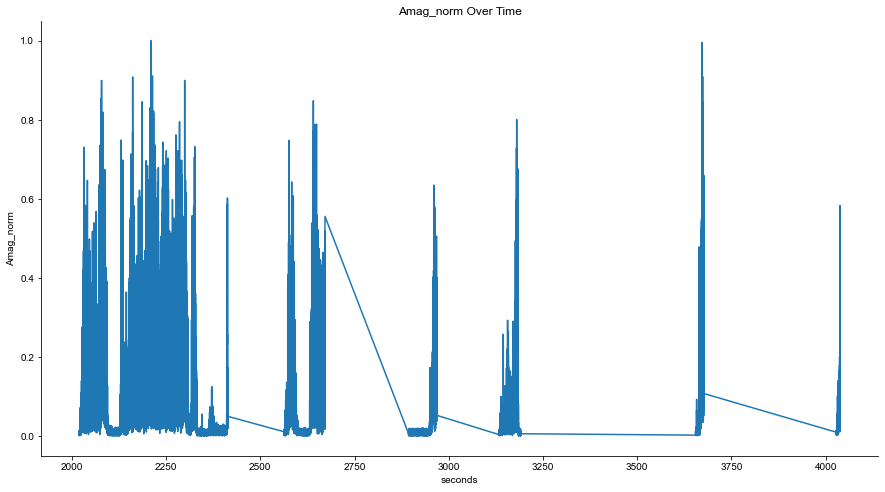

In [14]:
# Adjusting the size and adding title
plt.figure(figsize=(15,8))
plt.title('Amag_norm Over Time')

# Imporve the DPI of the charts
plt.rcParams['figure.dpi'] = 144
plt.rcParams['savefig.dpi'] = 300
sns.set(rc={'figure.dpi':144, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style('ticks')
sns.despine()

# Creating the line plot
ax=sns.lineplot(data=Normal_Rider_2_copy, x="seconds", y="Amag_norm")

#Saving the line plot
fig = ax.get_figure()
fig.patch.set_facecolor('white')
fig.savefig('Amag_norm Over Time.png')

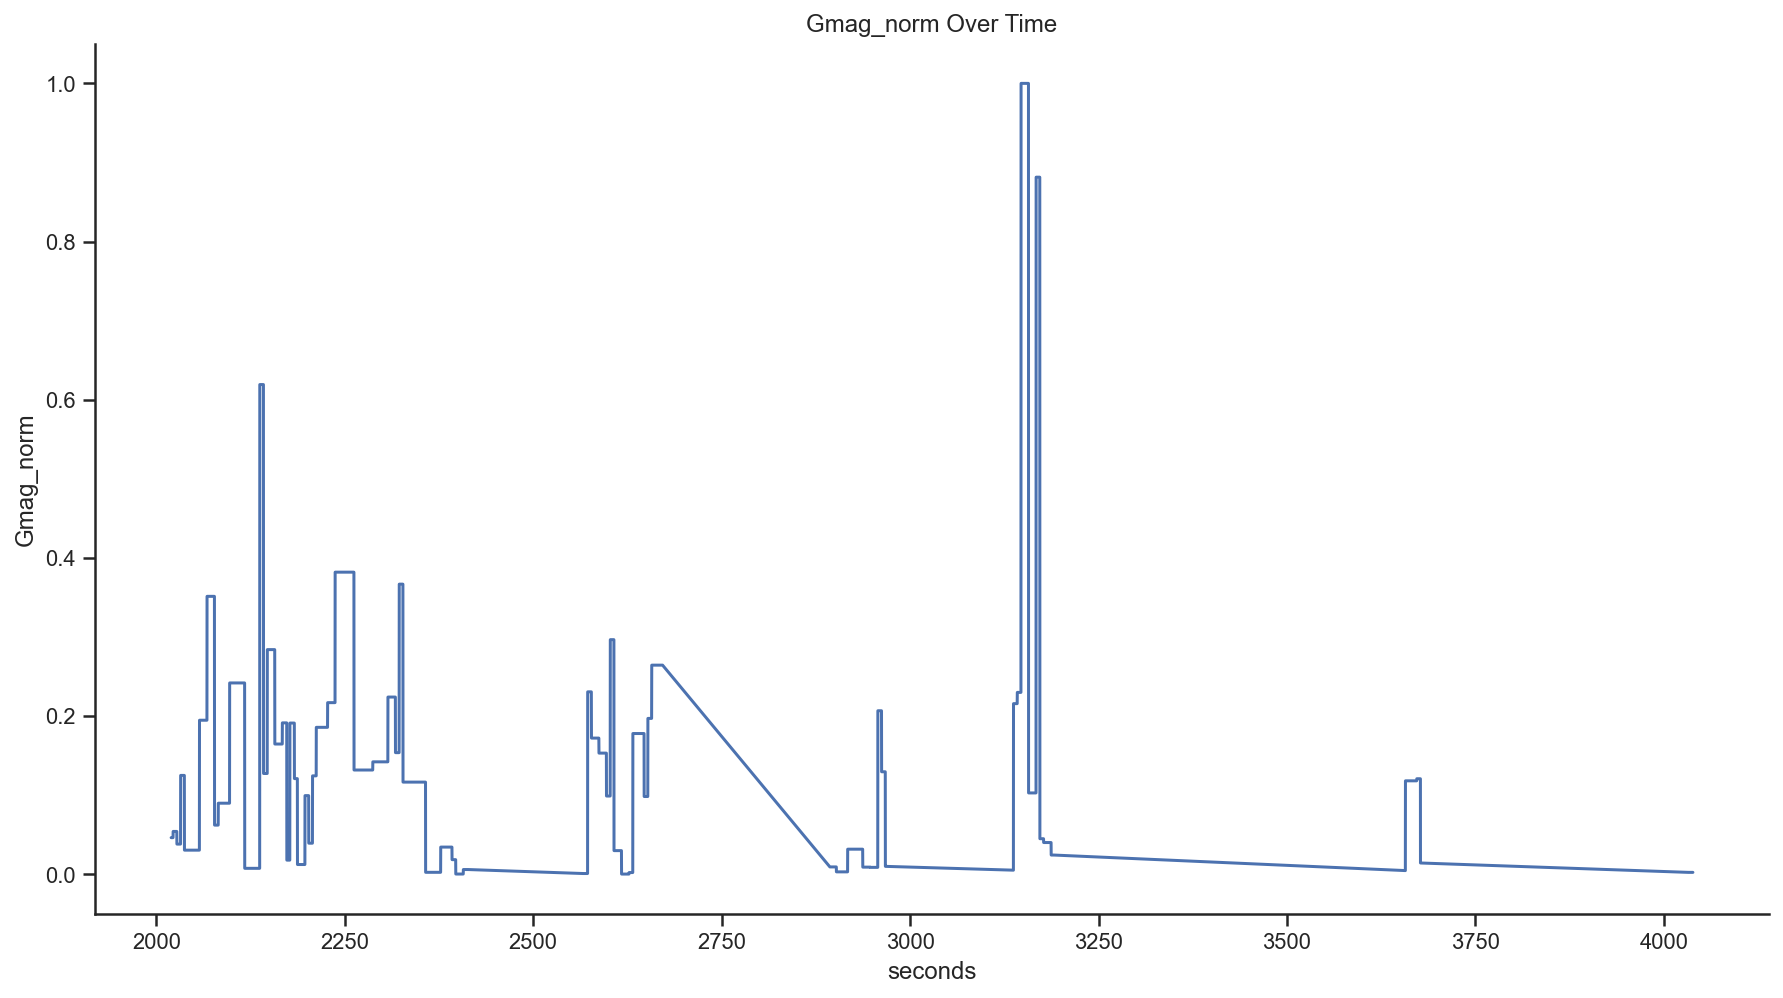

In [15]:
# Adjusting the size and adding title
plt.figure(figsize=(15,8))
plt.title('Gmag_norm Over Time')

# Imporve the DPI of the charts
plt.rcParams['figure.dpi'] = 144
plt.rcParams['savefig.dpi'] = 300
sns.set(rc={'figure.dpi':144, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style('ticks')
sns.despine()

# Creating the line plot
ax=sns.lineplot(data=Normal_Rider_2_copy, x="seconds", y="Gmag_norm")

#Saving the line plot
fig = ax.get_figure()
fig.patch.set_facecolor('white')
fig.savefig('Gmag_norm Over Time.png')

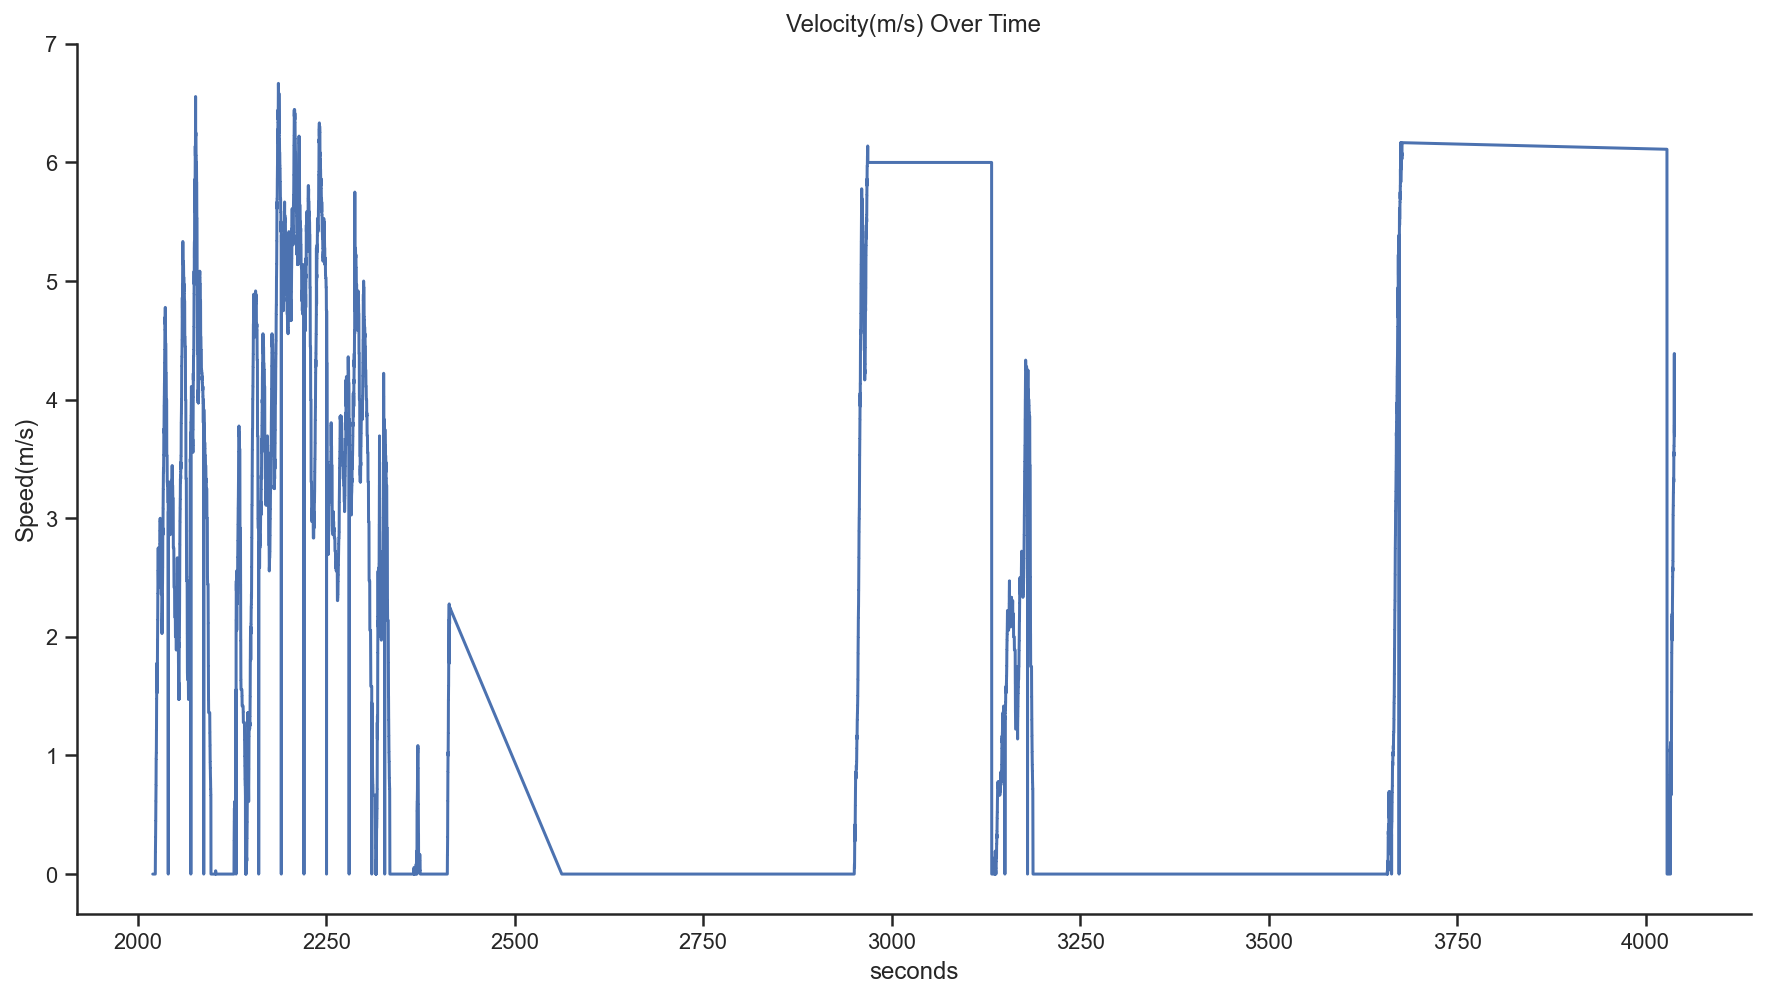

In [16]:
# Adjusting the size and adding title
plt.figure(figsize=(15,8))
plt.title('Velocity(m/s) Over Time')

# Imporve the DPI of the charts
plt.rcParams['figure.dpi'] = 144
plt.rcParams['savefig.dpi'] = 300
sns.set(rc={'figure.dpi':144, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style('ticks')
sns.despine()

# Creating the line plot
ax=sns.lineplot(data=Normal_Rider_2_copy, x="seconds", y="Speed(m/s)")

#Saving the line plot
fig = ax.get_figure()
fig.patch.set_facecolor('white')
fig.savefig('Velocity Over Time.png')